# WeatherPy

Observable Trends:
   1. As expected, the weather becomes significantly warmer as one approaches the equator.
   2. There is no strong relationship between latitude and cloudiness. 
   3. Wind speed appears to slightly increase as we move away from the equator. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
weather_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # Replace spaces with %20 to create url correctly 
    city = city.replace(" ", "%20")
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:

        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

597

In [20]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

In [4]:
# Create empty lists to append the API data into lists 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Start the call counter 
record = 1


# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the cities in the city list 
for city in cities:  
    
    # Try statement to append calls where value is found 
    # Not all calls return data as OpenWeatherMap will not have have records in all the cities generated by CityPy module
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
        
        # Increase counter by one 
        record= record + 1
        
        # Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.01)
        
    # If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Ribeira Grande
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d7fe9657df7023f90fafd4d7fa28ffc8&q=ribeira%20grande
Processing Record 2 | Mar del Plata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d7fe9657df7023f90fafd4d7fa28ffc8&q=mar%20del%20plata
Processing Record 3 | Cidreira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d7fe9657df7023f90fafd4d7fa28ffc8&q=cidreira
Processing Record 4 | Busselton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d7fe9657df7023f90fafd4d7fa28ffc8&q=busselton
Processing Record 5 | Geraldton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d7fe9657df7023f90fafd4d7fa28ffc8&q=geraldton
Processing Record 6 | George Town
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d7fe9657df7023f90fafd4d7fa28ffc8&q=georgetown
Processing Record 7 | Cape Town
http://api.openw

Processing Record 56 | Djougou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d7fe9657df7023f90fafd4d7fa28ffc8&q=djougou
Processing Record 57 | Saint George
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d7fe9657df7023f90fafd4d7fa28ffc8&q=saint%20george
Processing Record 58 | Katobu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d7fe9657df7023f90fafd4d7fa28ffc8&q=katobu
Processing Record 59 | Olafsvik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d7fe9657df7023f90fafd4d7fa28ffc8&q=olafsvik
Processing Record 60 | Khatanga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d7fe9657df7023f90fafd4d7fa28ffc8&q=khatanga
Processing Record 61 | College
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d7fe9657df7023f90fafd4d7fa28ffc8&q=college
Processing Record 62 | Deyang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d7fe9657df7023f90fafd4d7fa28ffc8&q=d

City not found. Skipping...
Processing Record 112 | Atuona
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d7fe9657df7023f90fafd4d7fa28ffc8&q=atuona
Processing Record 113 | Kongoussi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d7fe9657df7023f90fafd4d7fa28ffc8&q=kongoussi
Processing Record 114 | Maniitsoq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d7fe9657df7023f90fafd4d7fa28ffc8&q=maniitsoq
Processing Record 115 | Ponta do Sol
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d7fe9657df7023f90fafd4d7fa28ffc8&q=ponta%20do%20sol
Processing Record 116 | Hobart
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d7fe9657df7023f90fafd4d7fa28ffc8&q=hobart
Processing Record 117 | Palmer
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d7fe9657df7023f90fafd4d7fa28ffc8&q=palmer
Processing Record 118 | Ende
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d

Processing Record 168 | Bac Lieu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d7fe9657df7023f90fafd4d7fa28ffc8&q=bac%20lieu
Processing Record 169 | Banka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d7fe9657df7023f90fafd4d7fa28ffc8&q=banka
Processing Record 170 | Tabou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d7fe9657df7023f90fafd4d7fa28ffc8&q=tabou
City not found. Skipping...
Processing Record 171 | Ejea de los Caballeros
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d7fe9657df7023f90fafd4d7fa28ffc8&q=ejea%20de%20los%20caballeros
Processing Record 172 | La Ronge
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d7fe9657df7023f90fafd4d7fa28ffc8&q=la%20ronge
Processing Record 173 | Kudahuvadhoo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d7fe9657df7023f90fafd4d7fa28ffc8&q=kudahuvadhoo
Processing Record 174 | Kuala Pilah
http://api.openweathermap.org/da

Processing Record 224 | Bodden Town
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d7fe9657df7023f90fafd4d7fa28ffc8&q=bodden%20town
City not found. Skipping...
Processing Record 225 | Vaitape
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d7fe9657df7023f90fafd4d7fa28ffc8&q=vaitape
Processing Record 226 | Cabo San Lucas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d7fe9657df7023f90fafd4d7fa28ffc8&q=cabo%20san%20lucas
Processing Record 227 | Omboue
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d7fe9657df7023f90fafd4d7fa28ffc8&q=omboue
Processing Record 228 | Gariadhar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d7fe9657df7023f90fafd4d7fa28ffc8&q=gariadhar
Processing Record 229 | Torbay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d7fe9657df7023f90fafd4d7fa28ffc8&q=torbay
Processing Record 230 | Avera
http://api.openweathermap.org/data/2.5/weather?units=Imp

Processing Record 280 | Beipiao
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d7fe9657df7023f90fafd4d7fa28ffc8&q=beipiao
Processing Record 281 | Tottori
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d7fe9657df7023f90fafd4d7fa28ffc8&q=tottori
City not found. Skipping...
Processing Record 282 | Rio de Janeiro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d7fe9657df7023f90fafd4d7fa28ffc8&q=rio%20de%20janeiro
Processing Record 283 | Indianola
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d7fe9657df7023f90fafd4d7fa28ffc8&q=indianola
Processing Record 284 | Yokadouma
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d7fe9657df7023f90fafd4d7fa28ffc8&q=yokadouma
Processing Record 285 | Paengaroa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d7fe9657df7023f90fafd4d7fa28ffc8&q=paengaroa
Processing Record 286 | Isiro
http://api.openweathermap.org/data/2.5/weather?units=I

City not found. Skipping...
Processing Record 335 | Bajil
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d7fe9657df7023f90fafd4d7fa28ffc8&q=bajil
Processing Record 336 | Otane
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d7fe9657df7023f90fafd4d7fa28ffc8&q=otane
Processing Record 337 | Ossora
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d7fe9657df7023f90fafd4d7fa28ffc8&q=ossora
Processing Record 338 | Goderich
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d7fe9657df7023f90fafd4d7fa28ffc8&q=goderich
Processing Record 339 | Saint-Philippe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d7fe9657df7023f90fafd4d7fa28ffc8&q=saint-philippe
Processing Record 340 | Barra do Garcas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d7fe9657df7023f90fafd4d7fa28ffc8&q=barra%20do%20garcas
City not found. Skipping...
Processing Record 341 | Meulaboh
http://api.openweathermap.o

Processing Record 390 | Isla Mujeres
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d7fe9657df7023f90fafd4d7fa28ffc8&q=isla%20mujeres
Processing Record 391 | Sheregesh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d7fe9657df7023f90fafd4d7fa28ffc8&q=sheregesh
Processing Record 392 | Harper
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d7fe9657df7023f90fafd4d7fa28ffc8&q=harper
Processing Record 393 | Vigrestad
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d7fe9657df7023f90fafd4d7fa28ffc8&q=vigrestad
Processing Record 394 | Port Keats
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d7fe9657df7023f90fafd4d7fa28ffc8&q=port%20keats
Processing Record 395 | Half Moon Bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d7fe9657df7023f90fafd4d7fa28ffc8&q=half%20moon%20bay
Processing Record 396 | Vetluga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=

Processing Record 446 | Ogbomosho
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d7fe9657df7023f90fafd4d7fa28ffc8&q=ogbomosho
Processing Record 447 | Carballo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d7fe9657df7023f90fafd4d7fa28ffc8&q=carballo
Processing Record 448 | High Rock
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d7fe9657df7023f90fafd4d7fa28ffc8&q=high%20rock
Processing Record 449 | Mapastepec
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d7fe9657df7023f90fafd4d7fa28ffc8&q=mapastepec
Processing Record 450 | Grand Gaube
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d7fe9657df7023f90fafd4d7fa28ffc8&q=grand%20gaube
Processing Record 451 | Jork
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d7fe9657df7023f90fafd4d7fa28ffc8&q=jork
Processing Record 452 | Fukuecho
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d7fe9657df7023f90fa

Processing Record 501 | San Juan de la Maguana
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d7fe9657df7023f90fafd4d7fa28ffc8&q=san%20juan%20de%20la%20maguana
Processing Record 502 | Beni Mazar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d7fe9657df7023f90fafd4d7fa28ffc8&q=beni%20mazar
Processing Record 503 | Kamenka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d7fe9657df7023f90fafd4d7fa28ffc8&q=kamenka
Processing Record 504 | Sao Paulo de Olivenca
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d7fe9657df7023f90fafd4d7fa28ffc8&q=sao%20paulo%20de%20olivenca
Processing Record 505 | Yuancheng
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d7fe9657df7023f90fafd4d7fa28ffc8&q=yuancheng
Processing Record 506 | Hermagor
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d7fe9657df7023f90fafd4d7fa28ffc8&q=hermagor
Processing Record 507 | Trenggalek
http://api.openweathe

In [39]:
# Create a dictonary with the lists generated
weatherpy_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

# Create a data frame from dictionary
weather_data_file = pd.DataFrame(weatherpy_dict)

# Display count of weather data values 
weather_data_file.count()

City          539
Cloudiness    539
Country       539
Date          539
Humidity      539
Lat           539
Lng           539
Max Temp      539
Wind Speed    539
dtype: int64

In [12]:

# Save data frame to CSV
weather_data_file.to_csv('output_data/cities.csv')

# Display data frame head 
weather_data_file.head()



,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Ribeira Grande,75,PT,1579942658,93,38.52,-28.70,60.80,19.46
1,Mar del Plata,100,AR,1579942456,93,-38.00,-57.56,64.00,3.36
2,Cidreira,0,BR,1579942723,85,-30.18,-50.21,68.74,7.61
3,Busselton,95,AU,1579942649,23,-33.65,115.33,89.01,21.79
4,Geraldton,0,AU,1579942725,45,-28.77,114.60,82.40,24.16


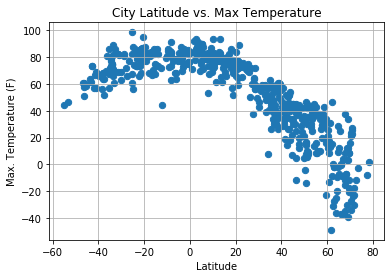

In [28]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s=40)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Max_Temp_vs_Latitude.png")

# Show plot
plt.show()

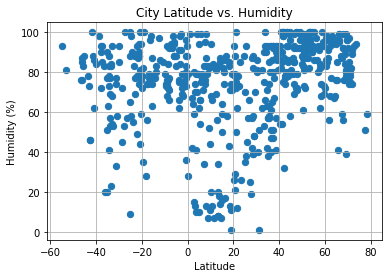

In [29]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=40)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Humidity_vs_Latitude.png")

# Show plot
plt.show()

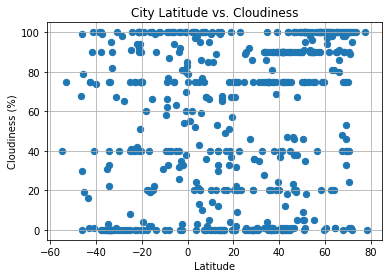

In [30]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s=40)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Cloudiness_vs_Latitude.png")

# Show plot
plt.show()

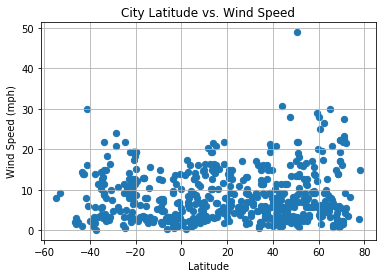

In [33]:

# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=40)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Wind_Speed_vs_Latitude.png")

# Show plot
plt.show()